In [24]:
# Importa Librerias

import pandas as pd
import numpy as np

%matplotlib inline


from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [3]:
# 1. Read in Data

df = pd.read_csv("DataSet/example_retail_sales.csv")

# Información del dataframe
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [4]:
df.describe ()


,y
count,293.000000
mean,308971.310580
std,86084.323897
min,146376.000000
25%,234503.000000
50%,314051.000000
75%,375795.000000
max,518253.000000


In [5]:
df.dtypes

ds    object
y      int64
dtype: object

In [6]:
# Ajuste de Dataframe para que ds tenga formato fecha

df['ds'] = pd.DatetimeIndex(df['ds'])
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

<AxesSubplot:>

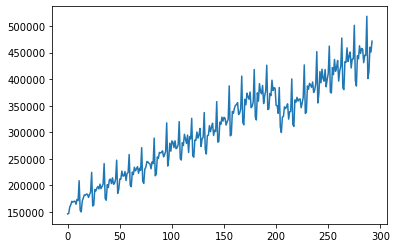

In [7]:
df['y'].plot()

# Standardize the dataset using Numpy

In [14]:
df['log_y'] = np.log(df['y'])

In [15]:
df.head()

,ds,y,log_y
0,1992-01-01,146376,11.893934
1,1992-02-01,147079,11.898725
2,1992-03-01,159336,11.978770
3,1992-04-01,163669,12.005601
4,1992-05-01,170068,12.043954


<AxesSubplot:>

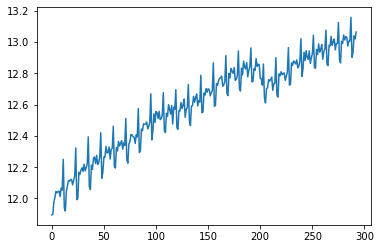

In [16]:
df['log_y'].plot()

In [47]:
df_log=df.iloc[:,[0,2]]
df_log.columns = ['ds', 'y']
df_log.head()

,ds,y
0,1992-01-01,11.893934
1,1992-02-01,11.898725
2,1992-03-01,11.978770
3,1992-04-01,12.005601
4,1992-05-01,12.043954


# Train Model

In [48]:
m = Prophet()
m.fit(df_log)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Forcast 6 months future

In [66]:
future = m.make_future_dataframe(periods=6, freq='MS')
future.tail(10)

,ds
289,2016-02-01
290,2016-03-01
291,2016-04-01
292,2016-05-01
293,2016-06-01
294,2016-07-01
295,2016-08-01
296,2016-09-01
297,2016-10-01
298,2016-11-01


In [67]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-07-01,13.056140,13.036011,13.075455
295,2016-08-01,13.076720,13.056460,13.096113
296,2016-09-01,13.009710,12.988414,13.029435
297,2016-10-01,13.048742,13.028300,13.069827
298,2016-11-01,13.053221,13.032506,13.077230


forecast is essentially a pandas dataframe and consists of a lot of fields. The predict method will assign each row in future a predicted value which it names yhat and the range is defined by yhat_lower andyhat_upper . These ranges can be considered as uncertainty levels.

### Plotting the Forecast

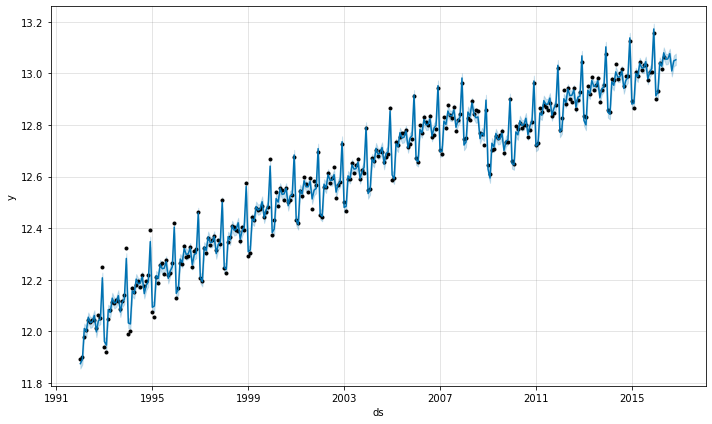

In [68]:
fig1 = m.plot(forecast)

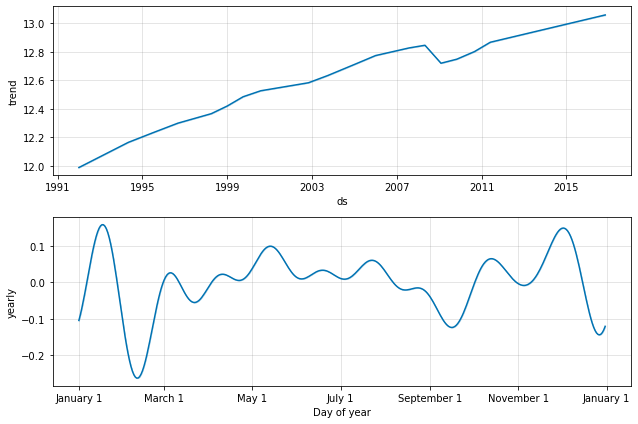

In [69]:
m.plot_components(forecast);

# Sales Prediction

We can evaluate the performance of the predictions using the cross_validation function in Prophet.

In [79]:
from fbprophet.diagnostics import cross_validation

#data_cv = cross_validation(m, initial='24 months', period='6 month', horizon='12 month')
#data_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
data_cv = cross_validation(m, initial='730 days', period='180 days', horizon='180 days')

INFO:fbprophet:Making 45 forecasts with cutoffs between 1994-02-26 00:00:00 and 2015-11-03 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


In [80]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

performance_metrics(data_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,18 days,0.001750,0.041831,0.030192,0.002394,0.001937,0.435897
1,19 days,0.001655,0.040686,0.029077,0.002309,0.001916,0.461538
2,20 days,0.001673,0.040897,0.029360,0.002327,0.001916,0.461538
3,22 days,0.001646,0.040569,0.028594,0.002265,0.001763,0.500000
4,23 days,0.001065,0.032634,0.023737,0.001872,0.001763,0.538462
...,...,...,...,...,...,...,...
130,176 days,0.002987,0.054655,0.038703,0.003057,0.002287,0.500000
131,177 days,0.002526,0.050257,0.035138,0.002757,0.002167,0.448718
132,178 days,0.002544,0.050433,0.035417,0.002775,0.002167,0.423077
133,179 days,0.002508,0.050082,0.034902,0.002732,0.002068,0.461538


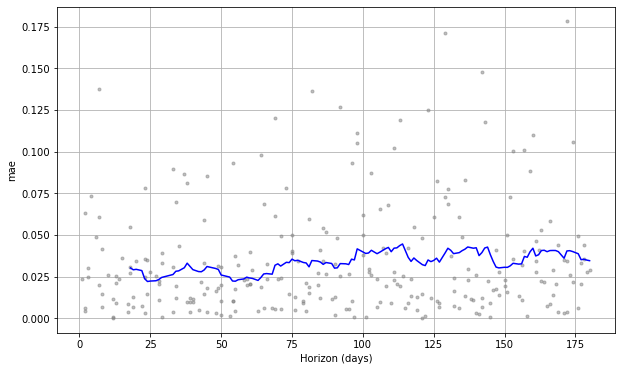

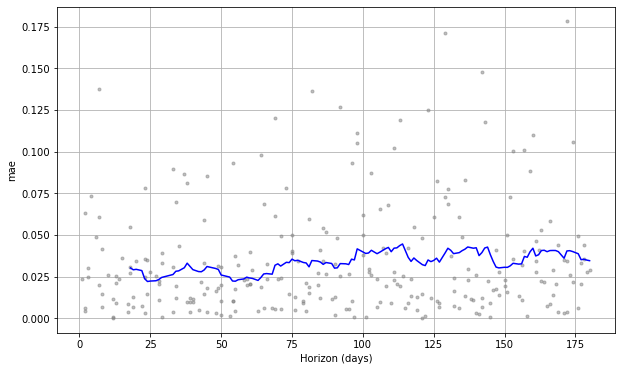

In [81]:
plot_cross_validation_metric(data_cv, metric='mae')

# Conclusions